In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score

%matplotlib inline 

### Importing Data and Adding Intercept/Bias Column

In [2]:
wine_data = pd.read_csv("winequality-red.csv", sep=";")

In [3]:
def standardize_columns(column):
    if np.std(column) != 0:
        standardized_column = (1/np.std(column))*(column- np.mean(column))
    else:
        standardized_column = column
    return standardized_column

standardized_data = wine_data.apply(standardize_columns, axis = 0)
standardized_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


### Selecting the design matrix and the target variable

In [4]:
X= standardized_data.drop(columns = "quality")
y = standardized_data["quality"]

### Ordinary Least Squares 

In [5]:
from sklearn import linear_model as lm
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
linear_model = lm.LinearRegression(fit_intercept = True, normalize = False)
model= linear_model.fit(X_train, y_train)
coefficients_array = model.coef_
indices = X_train.columns
coefficients = pd.DataFrame(coefficients_array,index = indices).rename(columns = {0: "coefficients"})
coefficients 


,coefficients
fixed acidity,0.047349
volatile acidity,-0.233698
citric acid,-0.046807
residual sugar,0.030236
chlorides,-0.103999
free sulfur dioxide,0.052091
total sulfur dioxide,-0.138830
density,-0.037916
pH,-0.086177
sulphates,0.193277


In [6]:
linear_model.intercept_

0.0019625495881435027

In [7]:
def rmse(actual_y, predicted_y):
    return np.sqrt((1/len(actual_y)*sum((actual_y - predicted_y)**2)))

y_pred = model.predict(X_test)
test_error = rmse(y_test, y_pred)
test_error

0.6524215872529194

/srv/conda/envs/data100/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


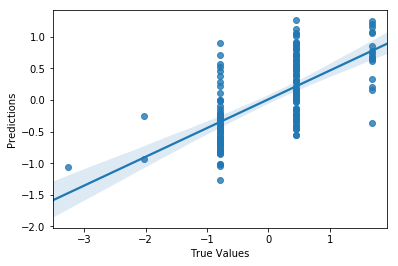

In [8]:
#plt.scatter(y_test, y_pred, fit_)
ax = sns.regplot(y_test, y_pred);
ax.set(xlabel = ("True Values"));
ax.set(ylabel = ("Predictions"));

### Lasso Regression 

Text(17.200000000000003, 0.5, 'Cross validation error')

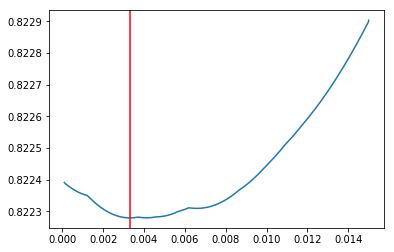

In [10]:
alphas = np.arange(0.0001, 0.015, 0.0000005)
lasso = lm.LassoCV(alphas=alphas, cv=5, normalize = False)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
opt_rmse = np.argmin(np.sqrt(np.apply_along_axis(np.mean, 1, lasso.mse_path_)))
plt.plot(lasso.alphas_, np.sqrt(np.apply_along_axis(np.mean, 1, lasso.mse_path_)))
opt_alpha = lasso.alphas_[opt_rmse]
plt.axvline(opt_alpha, color = "red")
ax.set_xlabel('Lambda')
ax.set_ylabel('Cross validation error')

In [22]:
lasso.intercept_

0.001923939121677931

In [21]:
indices = X_train.columns
coefficients = pd.DataFrame(lasso.coef_,index = indices).rename(columns = {0: "coefficients"})
coefficients 

,coefficients
fixed acidity,0.018528
volatile acidity,-0.228981
citric acid,-0.029503
residual sugar,0.018332
chlorides,-0.102301
free sulfur dioxide,0.045420
total sulfur dioxide,-0.132537
density,-0.013815
pH,-0.089036
sulphates,0.185531


In [24]:
test_error_lasso = rmse(y_test, y_pred_lasso)
test_error_lasso

0.6525842704192001

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__,
                      cross_val_score(model, X_train, y_train, cv = 5, scoring = "neg_mean_squared_error").mean()))
    
    
    

Ridge: -0.6763127306460086
Lasso: -1.0279618083424589


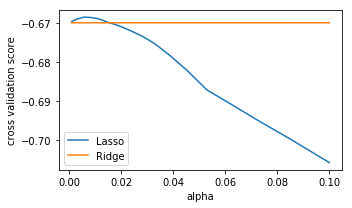

In [18]:
alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=5, scoring = "neg_mean_squared_error").mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()


### Ridge Regression

In [32]:
ridge_alphas = np.arange(1, 2000, 0.5)
ridge = lm.RidgeCV(alphas=ridge_alphas, scoring = "neg_mean_squared_error")
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
ridge.mse_path_


AttributeError: 'RidgeCV' object has no attribute 'mse_path_'

In [ ]:
plt.plot(np.arange(1, 251, 0.5)/ 250, np.mean(guidedmodel3.cv_values_,0)[:500])
plt.xticks(rotation='vertical')
plt.axvline(x=np.arange(1, 251, 0.5)[102]/200, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average Ridge RMSE Path')
ax.set_xlabel('Lambda')
ax.set_ylabel('RMSE (Cross validation error)')
min(np.mean(guidedmodel3.cv_values_,0))